In [1]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_electriccar/full_tweets.csv')
df.head()

,Tweet Text,Hashtag,Location
0,Join our next webinar on 'Alternative Fuel Typ...,Alternative fuel,Singapore
1,#evchargers #electriccharger #MakeInIndia #Voc...,Alternative fuel,"Sonipat, Haryana"
2,RT @events_wisdom: How the #hydrogen productio...,Alternative fuel,"São Paulo, Brazil"
3,How the #hydrogen production techniques are im...,Alternative fuel,NaN
4,RT @EFill_Electric: #electriccharger #latestEV...,Alternative fuel,NaN


In [3]:
df.reset_index()

,index,Tweet Text,Hashtag,Location
0,0,Join our next webinar on 'Alternative Fuel Typ...,Alternative fuel,Singapore
1,1,#evchargers #electriccharger #MakeInIndia #Voc...,Alternative fuel,"Sonipat, Haryana"
2,2,RT @events_wisdom: How the #hydrogen productio...,Alternative fuel,"São Paulo, Brazil"
3,3,How the #hydrogen production techniques are im...,Alternative fuel,NaN
4,4,RT @EFill_Electric: #electriccharger #latestEV...,Alternative fuel,NaN
...,...,...,...,...
92800,92800,RT @hydrogenfuelnew: An electric car is the fu...,Zeroemissions,"Fürth, Bayern"
92801,92801,Hydrogen cars: A beginner’s guide to the alter...,Zeroemissions,"Dubai, United Arab Emirates"
92802,92802,RT @HWoodElectrics: You could get a Ferrari #C...,Zeroemissions,"Cornellà de Llobregat, España"
92803,92803,@JohnMarshall765 @michaelbusby @TVietor08 #Kee...,Zeroemissions,Age of Enlightenment


In [4]:
df.shape

(92805, 3)

In [5]:
#df.columns = ['TweetText', 'Location']

In [6]:
# iterating the columns
for col in df.columns:
    print(col)

Tweet Text
Hashtag
Location


# Convert tweets to string


In [7]:
df['Tweet Text'] = df['Tweet Text'].apply(str)

# check for duplicates

In [8]:
df.drop_duplicates(subset=['Tweet Text'], keep='first', inplace=True)

In [9]:
df.shape

(45140, 3)

In [10]:
df.head(12)

,Tweet Text,Hashtag,Location
0,Join our next webinar on 'Alternative Fuel Typ...,Alternative fuel,Singapore
1,#evchargers #electriccharger #MakeInIndia #Voc...,Alternative fuel,"Sonipat, Haryana"
2,RT @events_wisdom: How the #hydrogen productio...,Alternative fuel,"São Paulo, Brazil"
3,How the #hydrogen production techniques are im...,Alternative fuel,NaN
4,RT @EFill_Electric: #electriccharger #latestEV...,Alternative fuel,NaN
5,#electriccharger #latestEVnews #MakeInIndia #V...,Alternative fuel,"Sonipat, Haryana"
6,RT @events_wisdom: Join our upcoming event to ...,Alternative fuel,"São Paulo, Brazil"
7,RT @HELLENICSHIP: Stena Line achieves another ...,Alternative fuel,Seven Seas 🌊
8,Stena Line achieves another world first using ...,Alternative fuel,HELLENICSHIPPINGNEWSWORLDWIDE
9,Join our upcoming event to hear from Robert Pa...,Alternative fuel,NaN


##  Count total number of characters and mean length of a tweet 

In [11]:
count = df['Tweet Text'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [12]:
print("Total number of words:", count.sum(), "words")

Total number of words: 742436 words


In [13]:
print("Mean number of words per tweet:", round(count.mean(),2), "words")

Mean number of words per tweet: 16.45 words


In [14]:
df["tweet_length"] = df["Tweet Text"].str.len()
print("Total length of the dataset is:", df.tweet_length.sum(), "characters")

Total length of the dataset is: 5709867 characters


In [15]:
print("Mean Length of a tweet is:", round(df.tweet_length.mean(),0), "characters")
df = df.drop(['tweet_length'], axis=1)

Mean Length of a tweet is: 126.0 characters


## Removing Twitter Handles (@user)

In [16]:
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [17]:
df['tidy_tweet'] = np.vectorize(remove_users)(df['Tweet Text'], "@ [\w]*", "@[\w]*")

## Normalization

In [18]:
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

In [19]:
# frequency count of column Hashtag
df_hashtags = df['Hashtag'].value_counts()
print(df_hashtags)

Tesla                       13519
Ev                           6369
Greenenergy                  5585
GoGreen                      2702
Electricvehicle              2498
Elonmusk                     1869
AutonomousVehicles           1665
Emobility                    1160
Sustainable living            880
Ecofriendly                   710
Electriccar                   640
Zeroemissions                 464
Selfdrivingcars               411
Autonomousdriving             403
Mahindra                      339
Sustainability                310
EVS                           289
Selfdriving                   276
Electricmobility              226
UrbanMobility                 173
DriveElectric                 120
Goelectric                    103
Audietron                      99
Modelx                         89
ConnectedVehicle               35
Carcharger                     33
EvBAttery                      32
Alternative fuel               26
Electricevehiclecharging       22
Futurecars    

In [20]:
# Visualization of Top 25 Hashtags
labels = df_hashtags.head(25).index.values.tolist()
freq = df_hashtags.head(25).values.tolist()
index = np.arange(len(freq))

Among 45140 Tweets, 41 Hashtags were used.


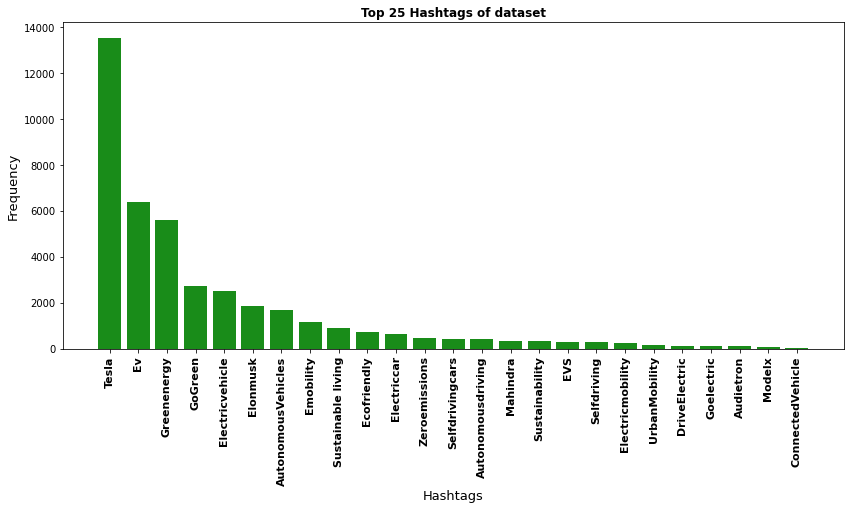

In [21]:
print("Among 45140 Tweets, 41 Hashtags were used.")
plt.figure(figsize=(14,6))
plt.bar(index, freq, alpha=0.9, color= 'green')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Hashtags of dataset', fontsize=12, fontweight="bold")
plt.show()

In [22]:
#@title Default title text
# frequency count of column Hashtag
df_location = df['Location'].value_counts()
print(df_location)

Ekerö, Sverige                895
India                         743
United States                 692
Johannesburg, South Africa    530
New Delhi, India              401
                             ... 
Andromeda Galaxy                1
lndia                           1
Altcoinworld                    1
Stoke on Trent                  1
واشنطن                          1
Name: Location, Length: 7395, dtype: int64


In [23]:
# Visualization of Top 25 location
labels1 = df_location.head(25).index.values.tolist()
freq1 = df_location.head(25).values.tolist()
index = np.arange(len(freq1))

Among 45140 Tweets, top 25 locations are


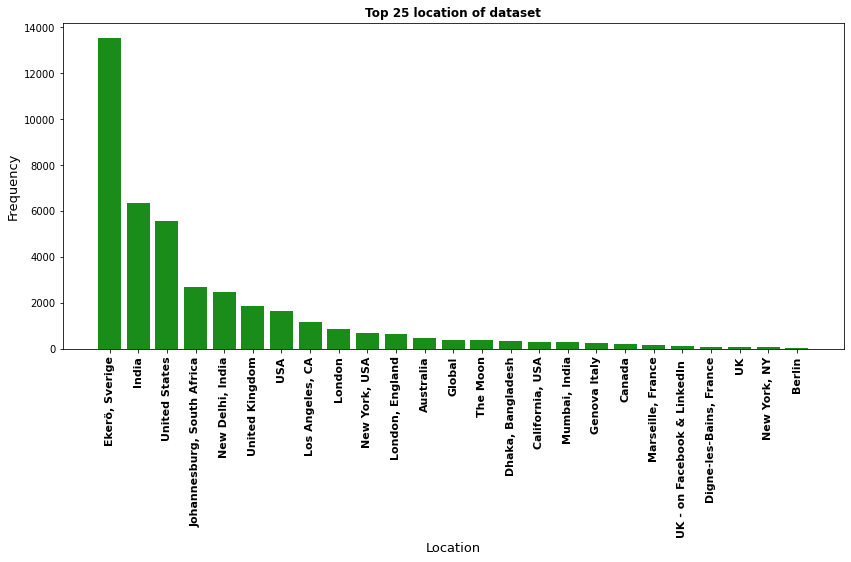

In [24]:
print("Among 45140 Tweets, top 25 locations are")
plt.figure(figsize=(14,6))
plt.bar(index, freq, alpha=0.9, color= 'green')
plt.xlabel('Location', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels1, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 location of dataset', fontsize=12, fontweight="bold")
plt.show()

In [25]:
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [26]:
df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")

In [27]:
# remove link

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [28]:
df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])

In [29]:
# remove special characters


df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [30]:
# remove short words


df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [31]:
# Tokenize words and clean-up Punctuations

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True Removes punctuations

In [32]:
df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))

In [33]:
# Remove Stopwords

# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt',])

In [34]:
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

In [35]:
df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])

In [36]:
# drop tweets less than 3 tokens

df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)

In [37]:
df = df.drop(['length'], axis=1)
df.shape

(36308, 6)

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
# WordCloud

# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

In [40]:
df['no_stop_joined'] = df.apply(rejoin_words, axis=1)

In [41]:
all_words = ' '.join([text for text in df['no_stop_joined']])

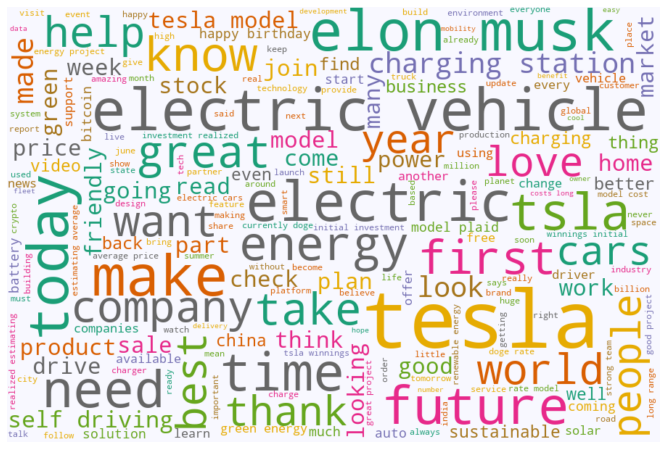

In [42]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [43]:
# Cleaning Effects - Length of tweets

df["tweet_length"] = df["Tweet Text"].str.len()
df["cleaned_tweet_length"] = df["no_stop_joined"].str.len()
df_lengths = df[['tweet_length', 'cleaned_tweet_length']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


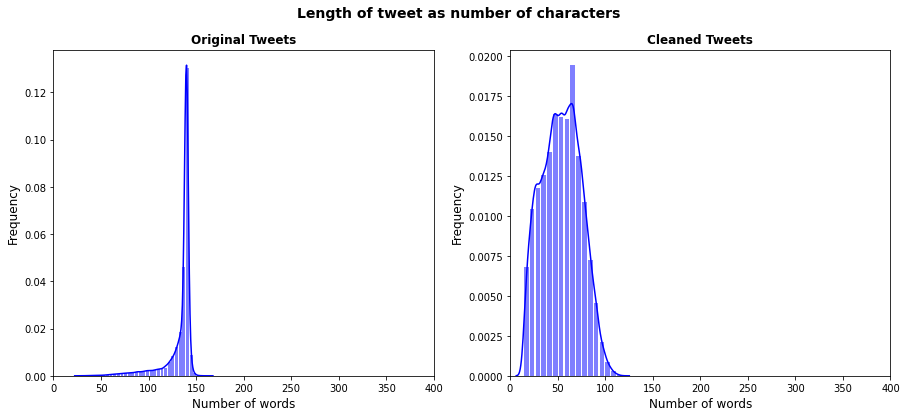

In [44]:
x1 = df_lengths.tweet_length
x2 = df_lengths.cleaned_tweet_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of characters', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x1, color="blue", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="blue", label="No. Words", bins=17, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

plt.show()

In [45]:
# Cleaning Effects - Number of Words

df["tweet_words"] = df['Tweet Text'].str.split().str.len()
df["cleaned_tweet_words"] = df["no_stop_joined"].str.split().str.len()
df_lengths = df[['tweet_words', 'cleaned_tweet_words']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


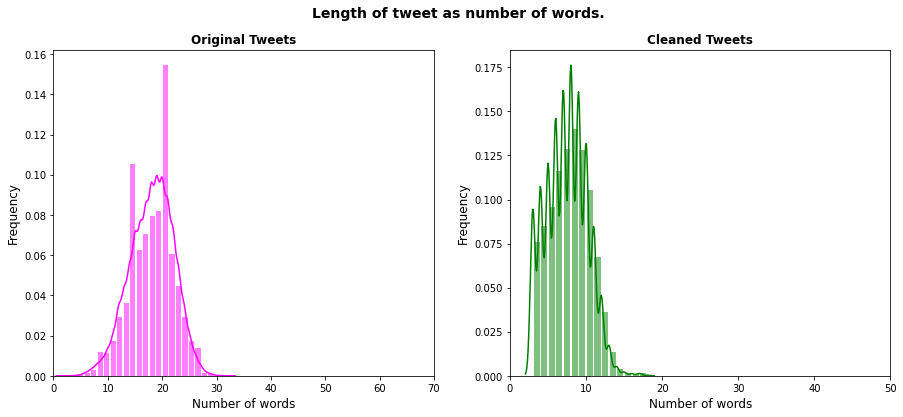

In [46]:
x_1 = df_lengths.tweet_words
x_2 = df_lengths.cleaned_tweet_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="Magenta", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,70])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="Green", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,50])

plt.show()

In [47]:
df = df.drop(['tweet_length', 'cleaned_tweet_length', 'tweet_words', 'cleaned_tweet_words'], axis=1)

In [48]:
# Top 25 Most frequent Words

word_freq = pd.Series(np.concatenate([x.split() for x in df.no_stop_joined])).value_counts()

In [49]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 29568


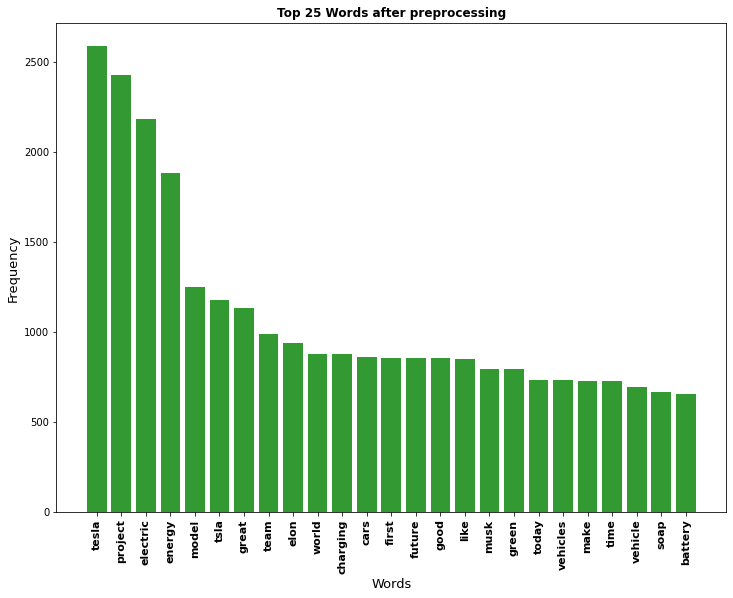

In [50]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'green')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [51]:
#to csv
df.to_csv('/content/drive/MyDrive/Capstone_electriccar/pre-processed.csv')

In [52]:
# save model 
df.to_pickle('/content/drive/MyDrive/Capstone_electriccar/pre-processed.pkl')

In [53]:
# continue to Topic modeling